Este notebook ilustra o problema de classificação.

O objetivo é classificar as amostras em Passou (1) ou Reprovou (0)

o alvo é o índice de Pass/Fail: 0 ou 1
função de perda é Entropia Cruzada
rede é uma camada densa linear com duas entradas e duas saídas (n. de classes)

## Importação das bibliotecas

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from IPython import display
from sklearn.model_selection import train_test_split

## Dataset: Leitura, normalização e visualização dos dados

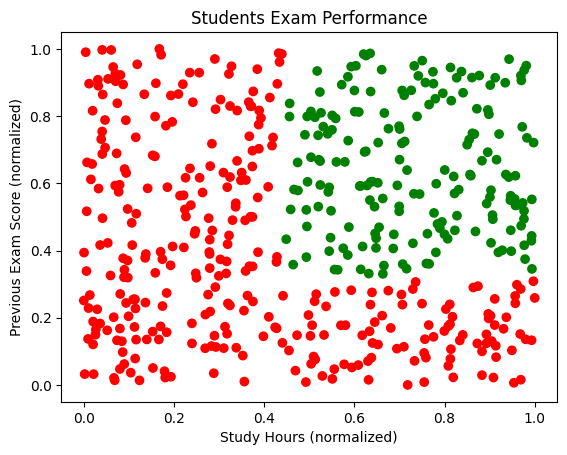

In [5]:
df = pd.read_csv('student_exam_data.csv')

# Seleciona as duas variáveis numéricas
X = df[['Study Hours', 'Previous Exam Score']].values

# Normalização manual (0 a 1)
Xc = X - X.min(axis=0)
Xs = Xc.max(axis=0)
Xc = Xc / Xs

# Define as classes (0 = Fail, 1 = Pass)
Y = df['Pass/Fail'].values

# Define cores: vermelho (reprovado) e verde (aprovado)
colors = np.array(['r', 'g'])

# Scatter plot
plt.scatter(Xc[:, 0], Xc[:, 1], c=colors[Y])
plt.xlabel('Study Hours (normalized)')
plt.ylabel('Previous Exam Score (normalized)')
plt.title('Students Exam Performance')
plt.show()


## Dividindo Dataset em Treinamento E Validação

In [6]:
x_train, x_test, y_train, y_test = train_test_split(Xc, Y, test_size=0.2, random_state=42)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 2)
(100, 2)
(400,)
(100,)


## Prepara os dados para o PyTorch

In [8]:
X_train_tensor = torch.FloatTensor(x_train)  # Entrada é FloatTensor
Y_train_tensor = torch.LongTensor(y_train)    # Classe é LongTensor
X_test_tensor = torch.FloatTensor(x_test)  # Entrada é FloatTensor
Y_test_tensor = torch.LongTensor(y_test)    # Classe é LongTensor

In [9]:
Y_train_tensor

tensor([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,

In [10]:
X_train_tensor

tensor([[0.8583, 0.6227],
        [0.0972, 0.5236],
        [0.2897, 0.1465],
        [0.6632, 0.3305],
        [0.0094, 0.1369],
        [0.0845, 0.1300],
        [0.5327, 0.1486],
        [0.6337, 0.1598],
        [0.7620, 0.4500],
        [0.1162, 0.5095],
        [0.7065, 0.2390],
        [0.4954, 0.7992],
        [0.0361, 0.4163],
        [0.7897, 0.4664],
        [0.9688, 0.2855],
        [0.3370, 0.5407],
        [0.9734, 0.5416],
        [0.0195, 0.8160],
        [0.1837, 0.2736],
        [0.0297, 0.2251],
        [0.6605, 0.9383],
        [0.6943, 0.1079],
        [0.5508, 0.8022],
        [0.4903, 0.7445],
        [0.5037, 0.8139],
        [0.3928, 0.7945],
        [0.3276, 0.9485],
        [0.9044, 0.1304],
        [0.8229, 0.4602],
        [0.2456, 0.4498],
        [0.1675, 1.0000],
        [0.8129, 0.0775],
        [0.0072, 0.6623],
        [0.8149, 0.8460],
        [0.9691, 0.0155],
        [0.1933, 0.0243],
        [0.9063, 0.5055],
        [0.4565, 0.8378],
        [0.5

## Construindo o modelo da rede

In [11]:
model = nn.Linear(2,2)  # 2 entradas e 2 saídas

### Fazendo um predict

In [12]:
out = model(X_train_tensor[:4,:]) # 4 amostras
out

tensor([[-0.5066,  0.1413],
        [-0.0869,  0.0527],
        [-0.4713,  0.1152],
        [-0.5836,  0.1452]], grad_fn=<AddmmBackward0>)

In [13]:
oo = F.softmax(out,dim=1)
oo

tensor([[0.3435, 0.6565],
        [0.4652, 0.5348],
        [0.3574, 0.6426],
        [0.3255, 0.6745]], grad_fn=<SoftmaxBackward0>)

### Calculando as probabilidades com Softmax

In [14]:
F.softmax(out,dim=1)*100

tensor([[34.3464, 65.6536],
        [46.5157, 53.4843],
        [35.7427, 64.2573],
        [32.5462, 67.4538]], grad_fn=<MulBackward0>)

### Predição da classe

In [15]:
prob,y_pred = torch.max(F.softmax(out,dim=1),dim=1)
print(y_pred)
print(prob)

tensor([1, 1, 1, 1])
tensor([0.6565, 0.5348, 0.6426, 0.6745], grad_fn=<MaxBackward0>)


## Treinamento

## Classe para visualização dinâmica

In [17]:
def predict(model, inputs):
    outputs = model(Variable(inputs))
    _, predicts = torch.max(outputs, 1)

    return predicts.data.numpy()

def predict_prob(model, inputs):
    outputs = model(Variable(inputs))
    outputs = F.softmax(outputs,dim=1)
    predicts, _ = torch.max(outputs, 1)

    return predicts.data.numpy()

class MyPlotter():
    def __init__(self, model, X, Y, n_epoch, filepath=None, h = .01):
        self.model = model
        self.X = X
        self.Y = Y
        self.n_epoch = n_epoch
        self.filepath = filepath
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        self.xx, self.yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        self.loss_hist = []
        self.val_loss_hist = []
        self.X_grid = np.c_[self.xx.ravel(), self.yy.ravel()]

        #Gráficos a serem mostrados pelo callback
        self.fig = plt.figure(figsize=(12, 4), dpi=100)
        self.ax1 = self.fig.add_subplot(1, 3, 1)
        self.ax1.set_xlim(0, self.n_epoch)
        self.ax1.set_xlabel('Epoca')#,fontsize=28)
        self.ax1.set_ylabel('Perda')#,fontsize=28)
        self.ax1.set_title('Perda x Época')
        self.ax1.plot([],[],'b',linewidth = 2.0,label = "Treino")
        self.ax1.grid(True)

        self.ax2 = self.fig.add_subplot(1, 3, 2)
        self.ax2.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax2.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax2.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax2.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax2.set_title('Fronteiras de decisão')

        self.ax3 = self.fig.add_subplot(1, 3, 3)
        self.ax3.set_xlim(Xc[:,0].min(), Xc[:,0].max())
        self.ax3.set_ylim(Xc[:,1].min(), Xc[:,1].max())
        self.ax3.set_xlabel('Comprimento da Sepala')#,fontsize=28)
        self.ax3.set_ylabel('Largura da Sepala')#,fontsize=28)
        self.ax3.set_title('Máxima probabilidade')

    def on_train_begin(self, logs={}):
        display.display(self.fig)
        display.clear_output(wait=True)

    def on_epoch_end(self, epoch, logs={}):
        if 'loss' in logs.keys():
            self.loss_hist.append(logs['loss'])

            if epoch%250==0:
                self.ax1.plot(np.arange(epoch+1), self.loss_hist, 'b', linewidth = 2.0)

                #Z = predict(self.model, torch.from_numpy(self.X_grid).type(torch.FloatTensor))
                Zc = predict(self.model,torch.FloatTensor(self.X_grid))
                Zc = Zc.reshape(self.xx.shape)

                self.ax2.pcolormesh(self.xx, self.yy, Zc, cmap=plt.cm.Paired)
                colors = np.array(['r','y'])
                self.ax2.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                Zp = predict_prob(self.model,torch.FloatTensor(self.X_grid))
                Zp = Zp.reshape(self.xx.shape)

                self.ax3.pcolormesh(self.xx, self.yy, Zp, cmap=plt.cm.magma)
                colors = np.array(['r','y','b'])
                self.ax3.scatter(self.X[:, 0], self.X[:, 1], s=40, c=colors[self.Y], edgecolors='k', cmap=plt.cm.Paired)

                display.display(self.fig)
                display.clear_output(wait=True)

### Laço principal de treinamento da Regressão Logística por Softmax

In [18]:
lr = 0.15

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [19]:
nb_epoch = 10000

losses = []
losses_test = []
acc_list = []
acc_test_list = []
for i in range(nb_epoch):
    # predict da rede
    output = model(X_train_tensor)
    output_test = model(X_test_tensor)

    # calcula a perda
    loss = criterion(output, Y_train_tensor)
    loss_test = criterion(output_test, Y_test_tensor)

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data.item())
    losses_test.append(loss_test.data.item())

    _, class_max = torch.max(F.softmax(output,dim=1),dim=1)
    _, class_test_max = torch.max(F.softmax(output_test,dim=1),dim=1)
    acc_list.append((class_max == Y_train_tensor).float().mean())
    acc_test_list.append((class_test_max == Y_test_tensor).float().mean())

    final_loss = loss.data.item()

print('Final loss:', final_loss)

Final loss: 0.25565046072006226


In [20]:
print(acc_list)

[tensor(0.4500), tensor(0.4925), tensor(0.5150), tensor(0.5150), tensor(0.5175), tensor(0.5250), tensor(0.5275), tensor(0.5350), tensor(0.5175), tensor(0.5350), tensor(0.5475), tensor(0.5450), tensor(0.5425), tensor(0.5475), tensor(0.5325), tensor(0.5450), tensor(0.5400), tensor(0.5425), tensor(0.5400), tensor(0.5350), tensor(0.5300), tensor(0.5300), tensor(0.5325), tensor(0.5350), tensor(0.5350), tensor(0.5325), tensor(0.5300), tensor(0.5325), tensor(0.5400), tensor(0.5475), tensor(0.5500), tensor(0.5550), tensor(0.5650), tensor(0.5675), tensor(0.5750), tensor(0.5775), tensor(0.5775), tensor(0.5775), tensor(0.5825), tensor(0.5825), tensor(0.5850), tensor(0.5850), tensor(0.5875), tensor(0.5875), tensor(0.5925), tensor(0.6050), tensor(0.6075), tensor(0.6075), tensor(0.6150), tensor(0.6225), tensor(0.6250), tensor(0.6300), tensor(0.6325), tensor(0.6375), tensor(0.6450), tensor(0.6500), tensor(0.6550), tensor(0.6550), tensor(0.6575), tensor(0.6575), tensor(0.6625), tensor(0.6675), tensor(

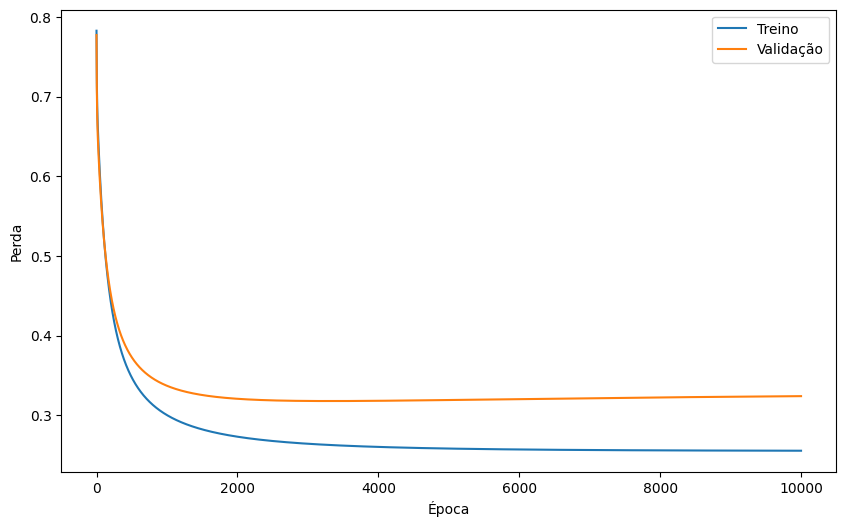

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(nb_epoch)), losses, label='Treino')
plt.plot(list(range(nb_epoch)), losses_test, label='Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.show()

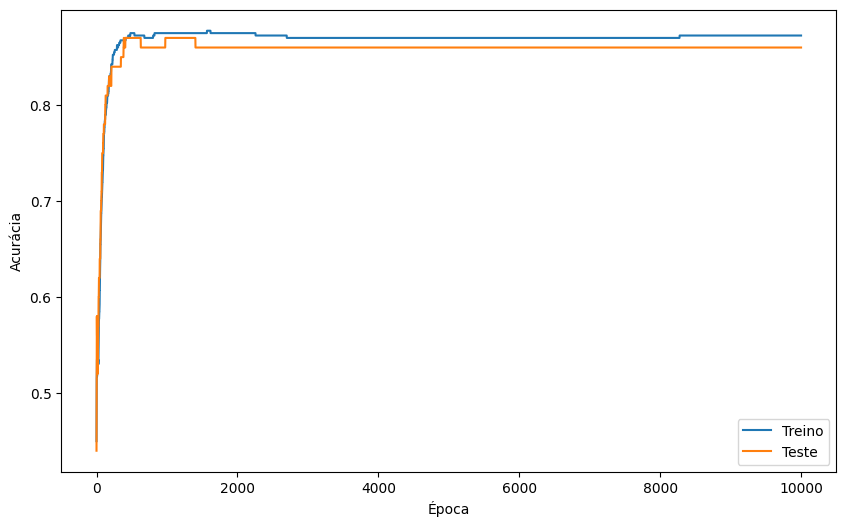

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(list(range(nb_epoch)), acc_list, label='Treino')
plt.plot(list(range(nb_epoch)), acc_test_list, label='Teste')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

## Avaliação

### Parâmetros após treinamento

In [23]:
model.state_dict()

OrderedDict([('weight',
              tensor([[-5.3455, -4.0684],
                      [ 4.8334,  4.6606]])),
             ('bias', tensor([ 5.3212, -5.6157]))])

### Salvando os parâmetros treinados

In [24]:
os.makedirs('../models',exist_ok=True)
torch.save(model.state_dict(),'../models/RegrLog_Iris.pt')

In [25]:
! ls ../models/

RegrLog_Iris.pt


In [26]:
nn.init.constant(model.weight,0)
model.state_dict()

/tmp/ipython-input-952960416.py:1: FutureWarning: `nn.init.constant` is now deprecated in favor of `nn.init.constant_`.
  nn.init.constant(model.weight,0)


OrderedDict([('weight',
              tensor([[0., 0.],
                      [0., 0.]])),
             ('bias', tensor([ 5.3212, -5.6157]))])

### Recuperando os pesos salvos

In [27]:
param_saved = torch.load('../models/RegrLog_Iris.pt')
model.load_state_dict(param_saved)
model.state_dict()

OrderedDict([('weight',
              tensor([[-5.3455, -4.0684],
                      [ 4.8334,  4.6606]])),
             ('bias', tensor([ 5.3212, -5.6157]))])

### Exatidão (acurácia) do classificador

Acurácia indica o número de acertos sobre o número total de amostras

In [30]:
X_tensor = torch.FloatTensor(Xc)

Y_pred = predict(model, X_tensor)
accuracy = (Y_pred == Y).mean()
print('Training Accuracy: ', accuracy)

Training Accuracy:  0.87


### Matriz de confusão

In [31]:
pd.crosstab(Y_pred, Y)

col_0,0,1
row_0,,
0,287,36
1,29,148


# O modelo foi melhor em prever quem reprovou (precisão de 0,889) do que quem passou (precisão de 0,836) e teve acurácia geral de 0,87.